# Análisis, Visualización y Curación de Datos

# Consigna 6

#### Calcular el tamaño del vocabulario del tutor y del estudiante por separado. Calcular los mismos valores pero eliminando las palabras que se repiten 3 o menos veces.


## Importación de modulos
---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter
import re

from columns_to_keep import C2K
from type_to_fix import T2F

np.random.seed(654802)

## Carga la tabla de mensajes preprocesados
---

In [2]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'train_yup_messages_preprocessed.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
dfd = pd.read_csv(full_data_file_name)

# Caracterización del dataset de mensajes
print ('Dimensiones del dataset de mensajes')
print ('Filas: {}'.format(dfd.shape[0]))
print ('Columnas: {}'.format(dfd.shape[1]))
print ('Cantidad de sesiones: ', dfd['session_id'].nunique())
print ('Cantidad de turnos: {}'.format(dfd.shape[0]))
print ('Cantidad de turnos del tutor: {}'.format(len(dfd[dfd.sent_from=='tutor'])))
print ('Cantidad de turnos del estudiante: {}'.format(len(dfd[dfd.sent_from=='student'])))

Dimensiones del dataset de mensajes
Filas: 1102917
Columnas: 6
Cantidad de sesiones:  17987
Cantidad de turnos: 1102917
Cantidad de turnos del tutor: 567931
Cantidad de turnos del estudiante: 420866


### Conversion de `str` a `list` campo text

In [3]:
dfd['text'] = dfd.text.apply(lambda x: literal_eval(x))

### Limpieza: Unificación de las expresiones algebraicas bajo el tag `<math>` 

In [4]:
# Los unigramas que contienen al menos un dígito y al menos un operador algebraico se unifican bajo el tag <math> 
# usando una expresión regular

r = re.compile('((?=.*[0-9])(?=.*[%\/\(\)\^\\\+\-\*\=]))^.*')
dfd['text'] = dfd.text.apply(lambda x: ['<math>' if r.match(w) else w for w in x])

### Generación de dataset alternativo con remoción de stopwords y non_words

In [5]:
dfd_nonstop = dfd.copy()

In [6]:
from nltk.corpus import stopwords
from string import punctuation

In [7]:
english_stopwords = stopwords.words('english')
non_words = list(punctuation)
def remove_stopwords(text):  
    # remove punctuation
    out = []
    text = [c for c in text if c not in non_words]
    for t in text:
        if t not in english_stopwords:
            out.append(t)


    return out


In [8]:
dfd_nonstop['text'] = dfd_nonstop.text.apply(lambda x: remove_stopwords(x))

## Cálculos
---

**Pasos:**

1. Conteo de palabras de tutores y estudiantes por separado
    1. Unigramas
    2. Bigramas
    3. Trigramas
2. Filtrado de palabras (unigramas) que no se repiten más de tres veces


In [9]:
# 1.A
tutores_counts = Counter([ token for tokens in dfd[dfd.sent_from=='tutor'].text  for token in tokens])
students_counts = Counter([ token for tokens in dfd[dfd.sent_from=='student'].text  for token in tokens])

# 1.B
tuto_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-2+1)]
stud_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-2+1)]
tuto_counts_bg = Counter(tuto_counts_bg)
stud_counts_bg = Counter(stud_counts_bg)

# 1.C
tuto_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-3+1)]
stud_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-3+1)]
tuto_counts_tg = Counter(tuto_counts_tg)
stud_counts_tg = Counter(stud_counts_tg)

# 2.
tutores_counts_wr = list(filter(lambda x:x[1]>3, tutores_counts.most_common()))
students_counts_wr = list(filter(lambda x:x[1]>3, students_counts.most_common()))


In [10]:
len_tutores_counts = len(tutores_counts)
len_students_counts = len(students_counts)

len_tutores_counts_wr = len(tutores_counts_wr)
len_students_counts_wr = len(students_counts_wr)

print('\n### Vocabulario de los Tutores: ###')
print(f'Tamaño del vocabulario de los tutores: {len_tutores_counts}')
print(f'Tamaño del vocabulario de los tutores (frecuencia mayor que 3): {len_tutores_counts_wr}')
print(f'El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el {100*len_tutores_counts_wr/len_tutores_counts:.2f}% del vocabulario total')

print('\n###  Vocabulario de los Estudiantes: ###')
print(f'Tamaño del vocabulario de los estudiantes: {len_students_counts}')
print(f'Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): {len_students_counts_wr}')
print(f'El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el {100*len_students_counts_wr/len_students_counts:.2f}% del vocabulario total')

print('\n### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###')
print('Considerando los unigramas con frecuencia mayor a 3:')
print(f'El tamaño del vocabulario los estudiantes representa el {100*len_students_counts_wr/len_tutores_counts_wr:.2f}% del tamaño del vocabulario de los tutores')




### Vocabulario de los Tutores: ###
Tamaño del vocabulario de los tutores: 33602
Tamaño del vocabulario de los tutores (frecuencia mayor que 3): 11474
El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el 34.15% del vocabulario total

###  Vocabulario de los Estudiantes: ###
Tamaño del vocabulario de los estudiantes: 31286
Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): 7826
El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el 25.01% del vocabulario total

### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###
Considerando los unigramas con frecuencia mayor a 3:
El tamaño del vocabulario los estudiantes representa el 68.21% del tamaño del vocabulario de los tutores


#### Sobre el vocabulario con stopwords y non words removidas:

In [11]:
# 1.A
tutores_counts_nonstop = Counter([ token for tokens in dfd_nonstop[dfd_nonstop.sent_from=='tutor'].text  for token in tokens])
students_counts_nonstop = Counter([ token for tokens in dfd_nonstop[dfd_nonstop.sent_from=='student'].text  for token in tokens])

# 1.B
tuto_counts_bg_nonstop = [' '.join(tokens[i:2+i]) for tokens in dfd_nonstop[dfd_nonstop.sent_from=='tutor'].text for i in range(len(tokens)-2+1)]
stud_counts_bg_nonstop = [' '.join(tokens[i:2+i]) for tokens in dfd_nonstop[dfd_nonstop.sent_from=='student'].text for i in range(len(tokens)-2+1)]
tuto_counts_bg_nonstop = Counter(tuto_counts_bg_nonstop)
stud_counts_bg_nonstop = Counter(stud_counts_bg_nonstop)

# 1.C
tuto_counts_tg_nonstop = [' '.join(tokens[i:3+i]) for tokens in dfd_nonstop[dfd_nonstop.sent_from=='tutor'].text for i in range(len(tokens)-3+1)]
stud_counts_tg_nonstop = [' '.join(tokens[i:3+i]) for tokens in dfd_nonstop[dfd_nonstop.sent_from=='student'].text for i in range(len(tokens)-3+1)]
tuto_counts_tg_nonstop = Counter(tuto_counts_tg_nonstop)
stud_counts_tg_nonstop = Counter(stud_counts_tg_nonstop)

# 2.
tutores_counts_wr_nonstop = list(filter(lambda x:x[1]>3, tutores_counts_nonstop.most_common()))
students_counts_wr_nonstop = list(filter(lambda x:x[1]>3, students_counts_nonstop.most_common()))


In [12]:
len_tutores_counts_nonstop = len(tutores_counts_nonstop)
len_students_counts_nonstop = len(students_counts_nonstop)

len_tutores_counts_wr_nonstop = len(tutores_counts_wr_nonstop)
len_students_counts_wr_nonstop = len(students_counts_wr_nonstop)

print('\n### Vocabulario de los Tutores: ###')
print(f'Tamaño del vocabulario de los tutores: {len_tutores_counts_nonstop}')
print(f'Tamaño del vocabulario de los tutores (frecuencia mayor que 3): {len_tutores_counts_wr_nonstop}')
print(f'El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el {100*len_tutores_counts_wr_nonstop/len_tutores_counts_nonstop:.2f}% del vocabulario total')

print('\n###  Vocabulario de los Estudiantes: ###')
print(f'Tamaño del vocabulario de los estudiantes: {len_students_counts_nonstop}')
print(f'Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): {len_students_counts_wr_nonstop}')
print(f'El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el {100*len_students_counts_wr_nonstop/len_students_counts_nonstop:.2f}% del vocabulario total')

print('\n### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###')
print('Considerando los unigramas con frecuencia mayor a 3:')
print(f'El tamaño del vocabulario los estudiantes representa el {100*len_students_counts_wr_nonstop/len_tutores_counts_wr_nonstop:.2f}% del tamaño del vocabulario de los tutores')




### Vocabulario de los Tutores: ###
Tamaño del vocabulario de los tutores: 33430
Tamaño del vocabulario de los tutores (frecuencia mayor que 3): 11311
El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el 33.83% del vocabulario total

###  Vocabulario de los Estudiantes: ###
Tamaño del vocabulario de los estudiantes: 31118
Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): 7666
El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el 24.64% del vocabulario total

### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###
Considerando los unigramas con frecuencia mayor a 3:
El tamaño del vocabulario los estudiantes representa el 67.77% del tamaño del vocabulario de los tutores


##### Se puede notar una ligera reducción en todos los vocabularios al eliminar stopwords y non words, como era de esperar, ya que estamos reduciendo la cantidad de palabras consideradas. Además, se reduce un poco el porcentaje de palabras con 3 o mas ocurrencias sobre el vocabulario total, lo cual tiene sentido, dado que las stopwords y los non words son en general palabras de gran ocurrencia en cualquier tipo de texto.

# Consigna 7 y 8

#### Realizar un gráfico frecuencia de unigramas del tutor. ¿Se cumple la ley de Zipf? Visualizar los 20 unigramas más frecuentes, los 20 unigramas menos frecuentes y 20 unigramas aleatorios en el medio de la distribución. Tratar de caracterizar las palabras, sacar conclusiones sobre qué tipo de palabras son, si son valiosas o no y cómo podríamos explotarlas o eliminar el ruido que traen. Hacer lo mismo para 2-gramas y 3 gramas.

#### Realizar el mismo análisis, pero sobre los turnos del estudiante. Opcional: Repetir el análisis quitando las palabras con una frecuencia menor o igual que 3.

## Ley de Zipf respecto de los unigramas del tutor y del estudiante

In [13]:
#################################################################
# Tutores: 
## Conteo de Unigramas, Bigramas y Trigramas
t_unigrams_counts = [i[1] for i in tutores_counts.most_common()]
t_bigrams_counts = [i[1] for i in tuto_counts_bg.most_common()]
t_trigrams_counts = [i[1] for i in tuto_counts_tg.most_common()]

## Unigramas, Bigramas y Trigramas
t_unigrams = [i[0] for i in tutores_counts.most_common()]
t_bigrams = [i[0] for i in tuto_counts_bg.most_common()]
t_trigrams = [i[0] for i in tuto_counts_tg.most_common()]

#################################################################
# Estudiantes:
## Conteo de Unigramas, Bigramas y Trigramas
s_unigrams_counts = [i[1] for i in students_counts.most_common()]
s_bigrams_counts = [i[1] for i in stud_counts_bg.most_common()]
s_trigrams_counts = [i[1] for i in stud_counts_tg.most_common()]

## Unigramas, Bigramas y Trigramas
s_unigrams = [i[0] for i in students_counts.most_common()]
s_bigrams = [i[0] for i in stud_counts_bg.most_common()]
s_trigrams = [i[0] for i in stud_counts_tg.most_common()]

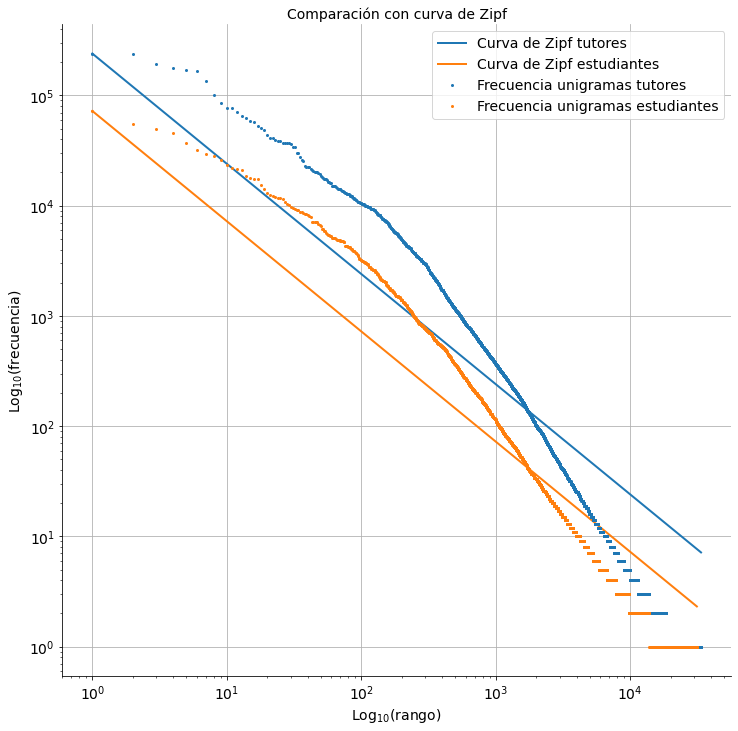

In [14]:
st = 1
ss = 1
n = np.array(list(range(1,1+len(t_unigrams_counts))))
nn = t_unigrams_counts[0] / (n**st)

m = np.array(list(range(1,1+len(s_unigrams_counts))))
mm = s_unigrams_counts[0] / (m**ss)

plt.figure(figsize=(12,12))
plt.loglog(n, nn, '-b', linewidth=2, label="Curva de Zipf tutores", color='tab:blue')
plt.loglog(m, mm, '-y', linewidth=2, label="Curva de Zipf estudiantes", color='tab:orange')
plt.loglog(n, t_unigrams_counts, 'o', label="Frecuencia unigramas tutores", color='tab:blue', markersize=2)
plt.loglog(m, s_unigrams_counts, 'o', label="Frecuencia unigramas estudiantes", color='tab:orange', markersize=2)
plt.grid(True)
plt.xlabel(r'Log$_{10}$(rango)', fontsize=14)
plt.ylabel(r'Log$_{10}$(frecuencia)', fontsize=14)
plt.title("Comparación con curva de Zipf", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
sns.despine()

### Ley de zipf sobre texto sin stopwords y non words

In [15]:
#################################################################
# Tutores: 
## Conteo de Unigramas, Bigramas y Trigramas
t_unigrams_counts_nonstop = [i[1] for i in tutores_counts_nonstop.most_common()]
t_bigrams_counts_nonstop = [i[1] for i in tuto_counts_bg_nonstop.most_common()]
t_trigrams_counts_nonstop = [i[1] for i in tuto_counts_tg_nonstop.most_common()]

## Unigramas, Bigramas y Trigramas
t_unigrams_nonstop = [i[0] for i in tutores_counts_nonstop.most_common()]
t_bigrams_nonstop = [i[0] for i in tuto_counts_bg_nonstop.most_common()]
t_trigrams_nonstop = [i[0] for i in tuto_counts_tg_nonstop.most_common()]

#################################################################
# Estudiantes:
## Conteo de Unigramas, Bigramas y Trigramas
s_unigrams_counts_nonstop = [i[1] for i in students_counts_nonstop.most_common()]
s_bigrams_counts_nonstop = [i[1] for i in stud_counts_bg_nonstop.most_common()]
s_trigrams_counts_nonstop = [i[1] for i in stud_counts_tg_nonstop.most_common()]

## Unigramas, Bigramas y Trigramas
s_unigrams_nonstop = [i[0] for i in students_counts_nonstop.most_common()]
s_bigrams_nonstop = [i[0] for i in stud_counts_bg_nonstop.most_common()]
s_trigrams_nonstop = [i[0] for i in stud_counts_tg_nonstop.most_common()]

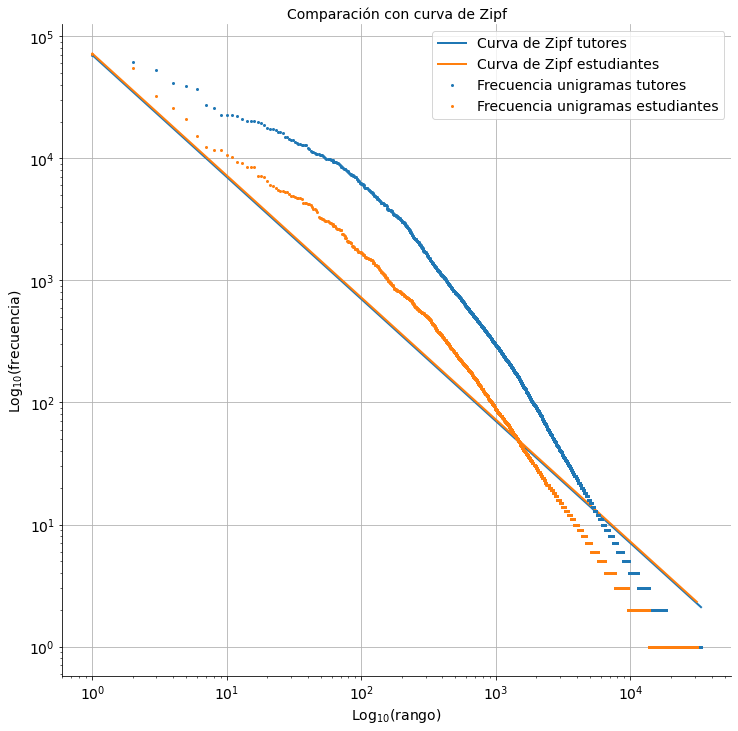

In [16]:
st = 1
ss = 1
n = np.array(list(range(1,1+len(t_unigrams_counts_nonstop))))
nn = t_unigrams_counts_nonstop[0] / (n**st)

m = np.array(list(range(1,1+len(s_unigrams_counts_nonstop))))
mm = s_unigrams_counts_nonstop[0] / (m**ss)

plt.figure(figsize=(12,12))
plt.loglog(n, nn, '-b', linewidth=2, label="Curva de Zipf tutores", color='tab:blue')
plt.loglog(m, mm, '-y', linewidth=2, label="Curva de Zipf estudiantes", color='tab:orange')
plt.loglog(n, t_unigrams_counts_nonstop, 'o', label="Frecuencia unigramas tutores", color='tab:blue', markersize=2)
plt.loglog(m, s_unigrams_counts_nonstop, 'o', label="Frecuencia unigramas estudiantes", color='tab:orange', markersize=2)
plt.grid(True)
plt.xlabel(r'Log$_{10}$(rango)', fontsize=14)
plt.ylabel(r'Log$_{10}$(frecuencia)', fontsize=14)
plt.title("Comparación con curva de Zipf", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
sns.despine()

Se puede ver que, si bien el comportamiento con y sin stopwords se asemejan, hay una diferencia notable en las palabras más frecuentes, habiendo sobre todo en los tutores una reducción significativa de la frecuencia en esa zona. Probablemente esto se deba principalmente a la eliminación de stopwords, y particularmente a los signos de puntuación, los cuales pueden tener una frecuencia superior en los tutores que en los estudiantes.

## Unigramas del tutor
#### Los 20 unigramas más frecuentes, los 20 menos frecuentes y 20 unigramas aleatorios en el medio de la distribución
---

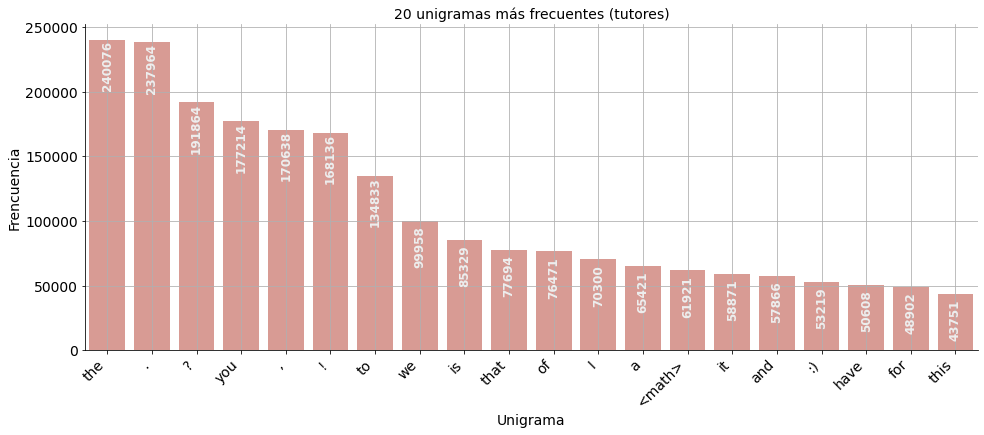

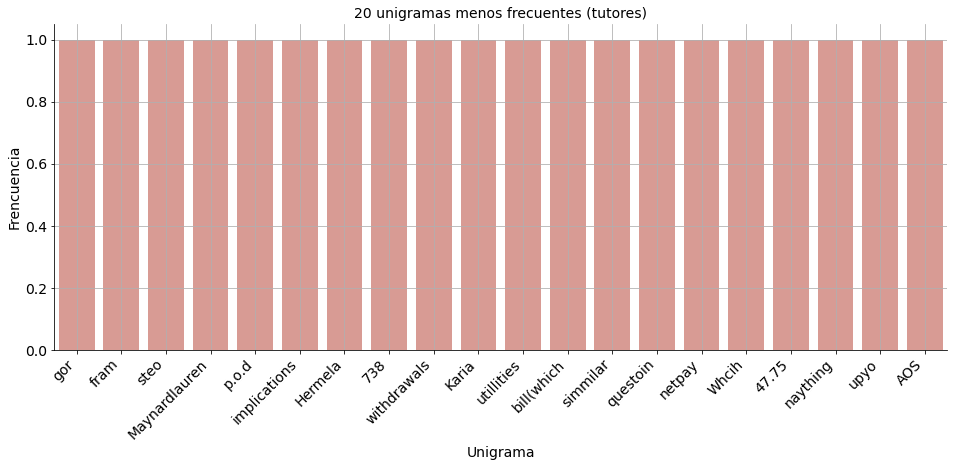

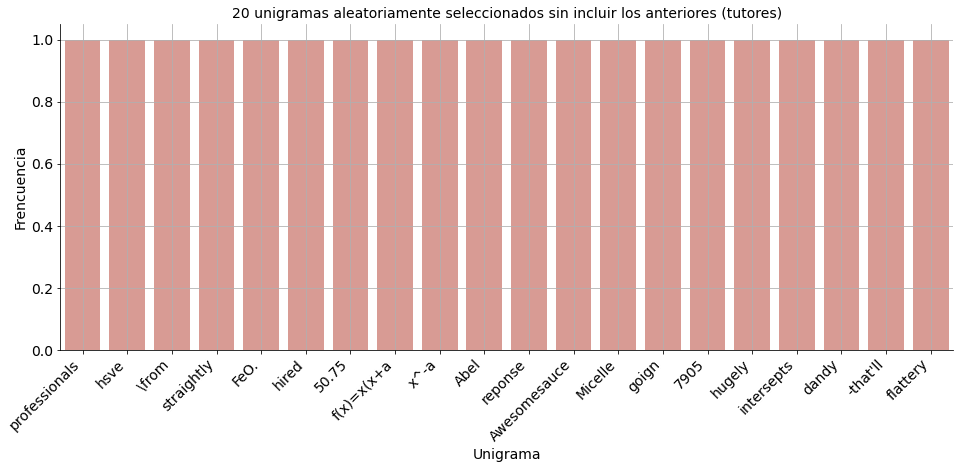

In [17]:
# Unigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[0:20], y=t_unigrams_counts[0:20], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_unigrams_counts[0:20]):
    chart.text(i, c-20000, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)


# Unigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[-20::1], y=t_unigrams_counts[-20::1], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len_tutores_counts -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_unigrams)[sample_indexs], y=np.array(t_unigrams_counts)[sample_indexs], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

##### Distribución sin stopwords y non words

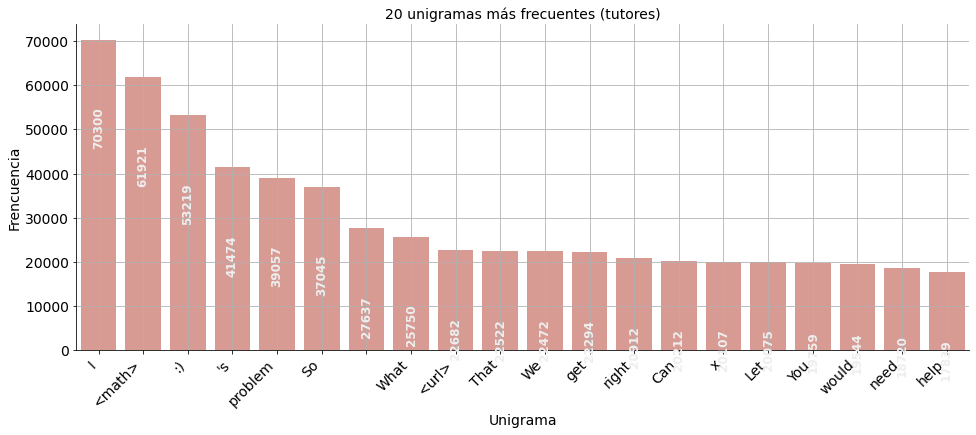

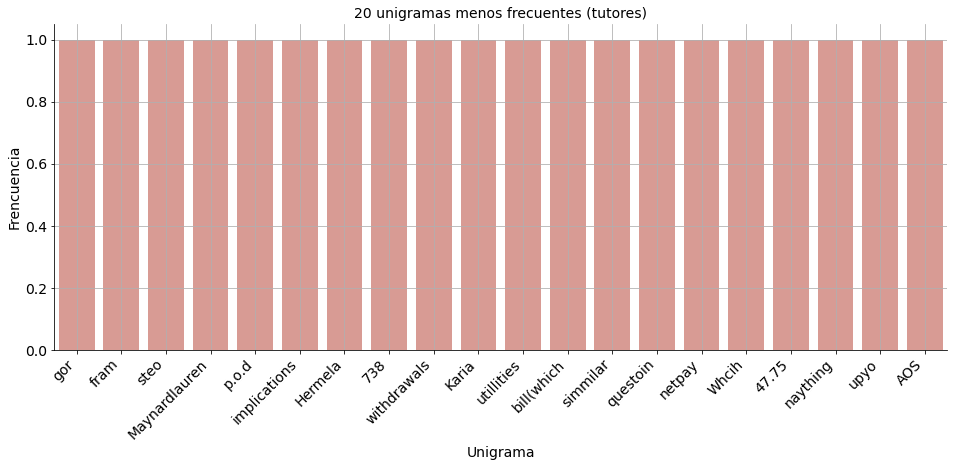

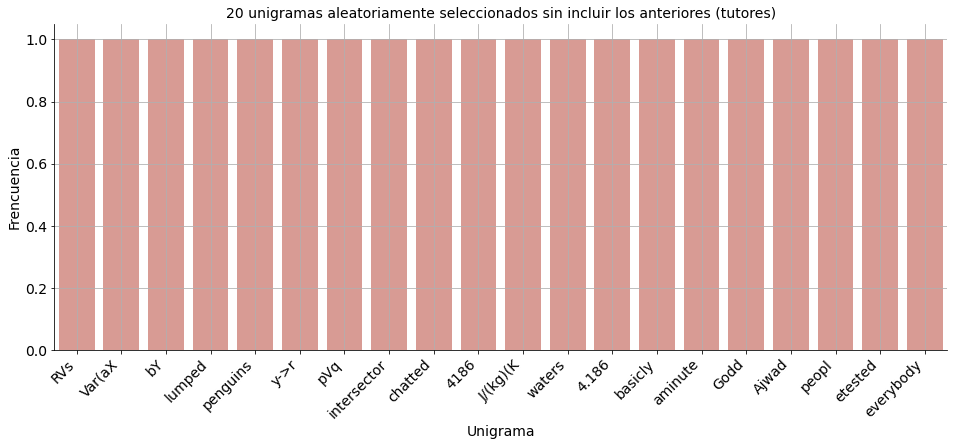

In [18]:
# Unigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams_nonstop[0:20], y=t_unigrams_counts_nonstop[0:20], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_unigrams_counts_nonstop[0:20]):
    chart.text(i, c-20000, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)


# Unigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams_nonstop[-20::1], y=t_unigrams_counts_nonstop[-20::1], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del tutor: 20 aleatorios
sample_index_t_nonstop = np.random.randint(20, len_tutores_counts_nonstop -40)
sample_indexs_nonstop = np.asarray(range(sample_index_t_nonstop,sample_index_t_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_unigrams_nonstop)[sample_indexs_nonstop], y=np.array(t_unigrams_counts_nonstop)[sample_indexs_nonstop], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

Se puede ver que el cambio radica principalmente en las palabras mas frecuentes, ya que la mayoría de las mismas son stopwords o non words en el primer caso, y eliminandolas obtenemos palabras más informativas. Por el contrario, la distribución de palabras menos frecuentes es la misma.

## Unigramas del estudiante
#### Los 20 unigramas más frecuentes, los 20 menos frecuentes y 20 unigramas aleatorios en el medio de la distribución
---

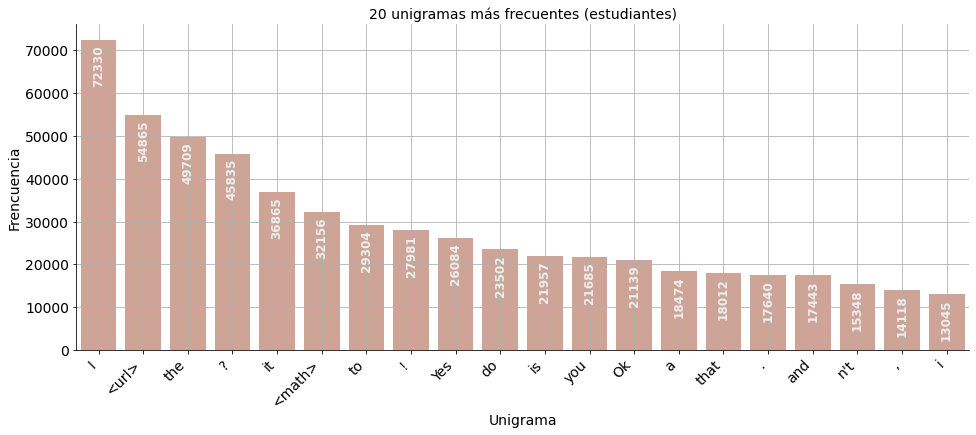

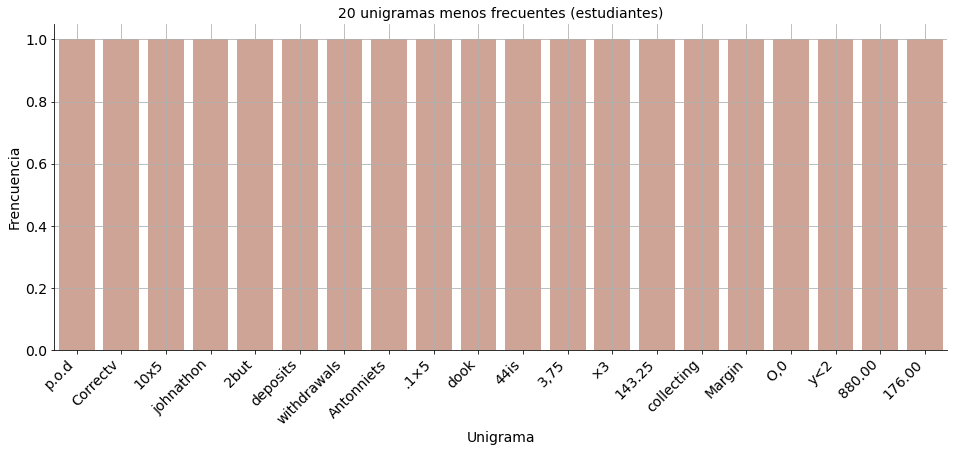

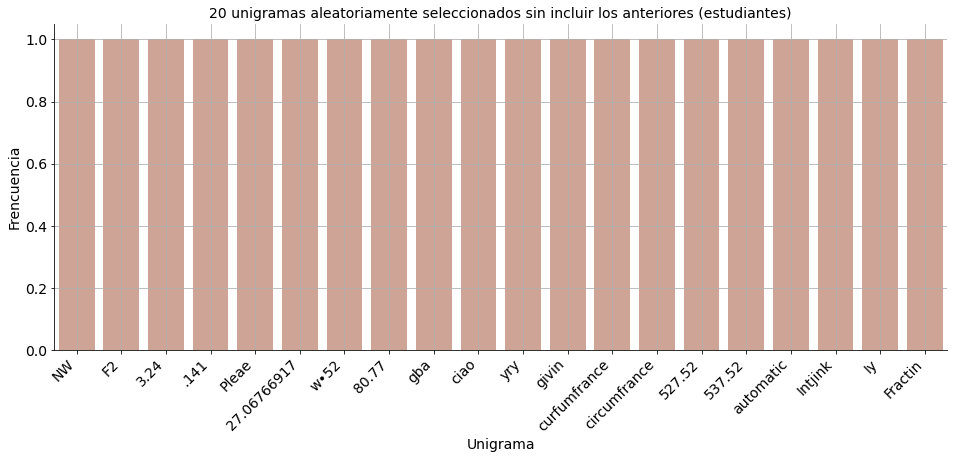

In [19]:
# Unigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams[0:20], y=s_unigrams_counts[0:20], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_unigrams_counts[0:20]):
    chart.text(i, c-(60000*0.1), c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)


# Unigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams[-20::1], y=s_unigrams_counts[-20::1], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len_students_counts -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_unigrams)[sample_indexs], y=np.array(s_unigrams_counts)[sample_indexs], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

##### Distribución sin stopwords y non words

/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


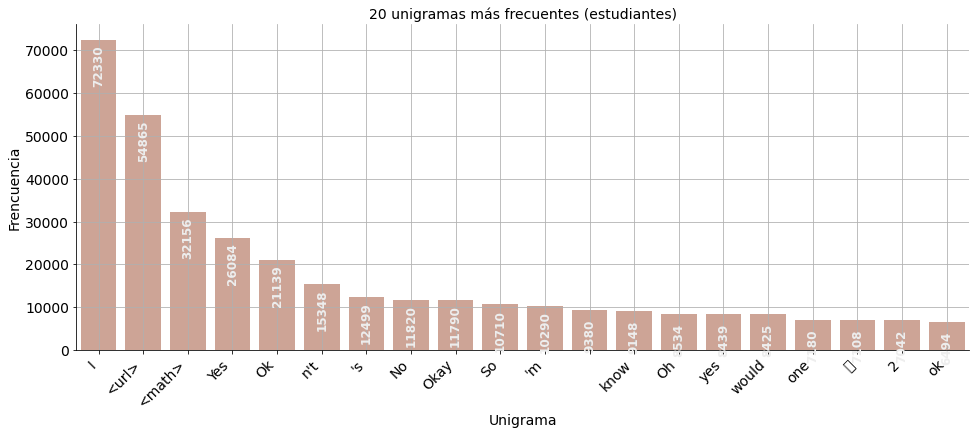

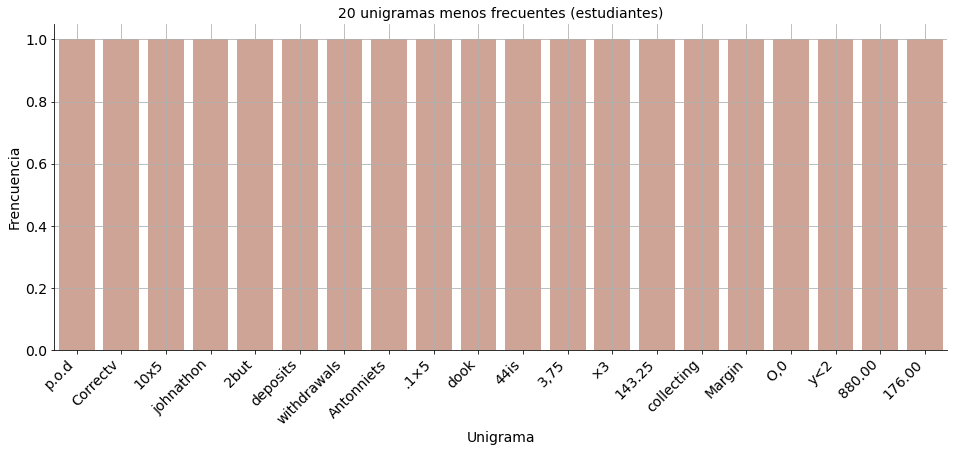

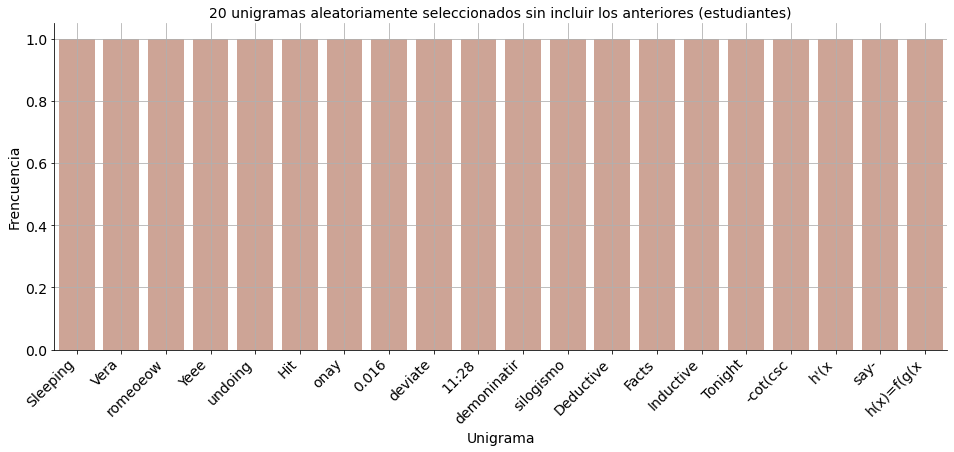

In [20]:
# Unigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams_nonstop[0:20], y=s_unigrams_counts_nonstop[0:20], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_unigrams_counts_nonstop[0:20]):
    chart.text(i, c-(60000*0.1), c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)


# Unigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams_nonstop[-20::1], y=s_unigrams_counts_nonstop[-20::1], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del estudiante: 20 aleatorios
sample_index_s_nonstop = np.random.randint(20, len_students_counts_nonstop -40)
sample_indexs_nonstop = np.asarray(range(sample_index_s_nonstop,sample_index_s_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_unigrams_nonstop)[sample_indexs_nonstop], y=np.array(s_unigrams_counts_nonstop)[sample_indexs_nonstop], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

Como vemos, en el caso de los estudiantes, si bien hay stopwords y non words entre las palabras más frecuentes, su ocurrencia es considerablemente menor que en el caso de los tutores, y observando las mismas se confirma la suposición sobre el comportamiento de la ley de zipf, las non stop son más frecuentes en el caso de los tutores, por el mayor uso de signos de puntuación.

# seguir aca

## Bigramas del tutor
#### Los 20 bigramas más frecuentes, los 20 menos frecuentes y 20 bigramas aleatorios en el medio de la distribución
---

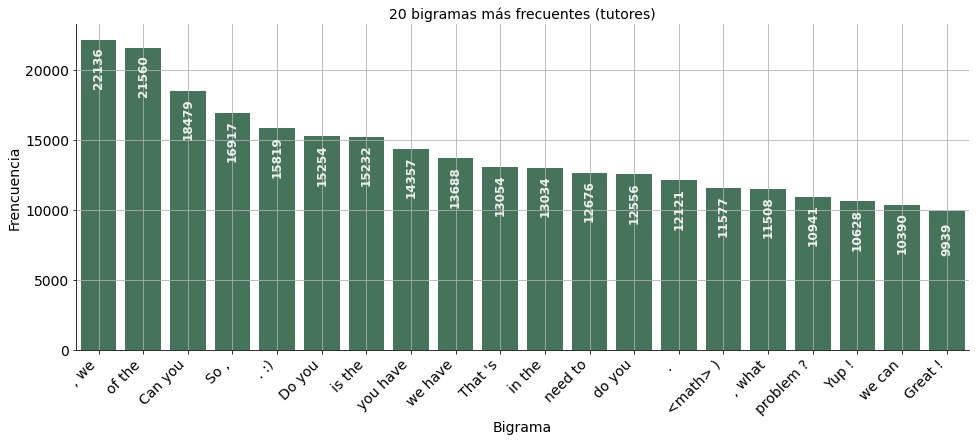

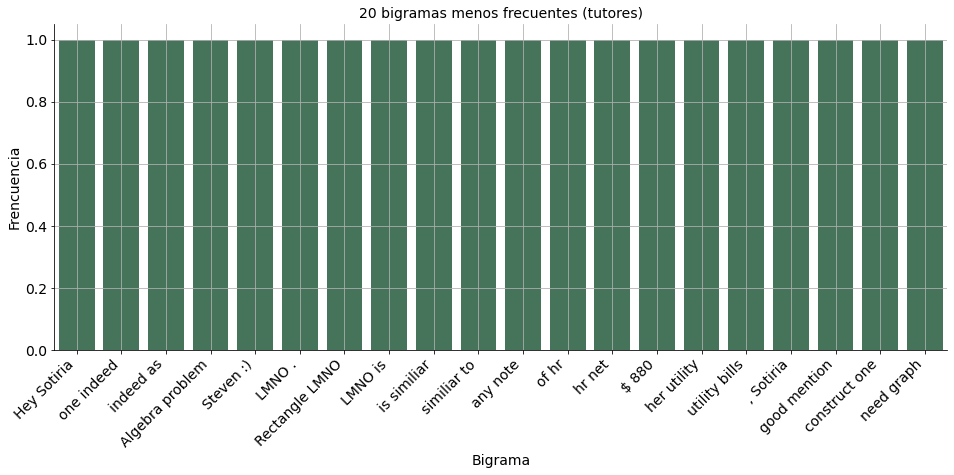

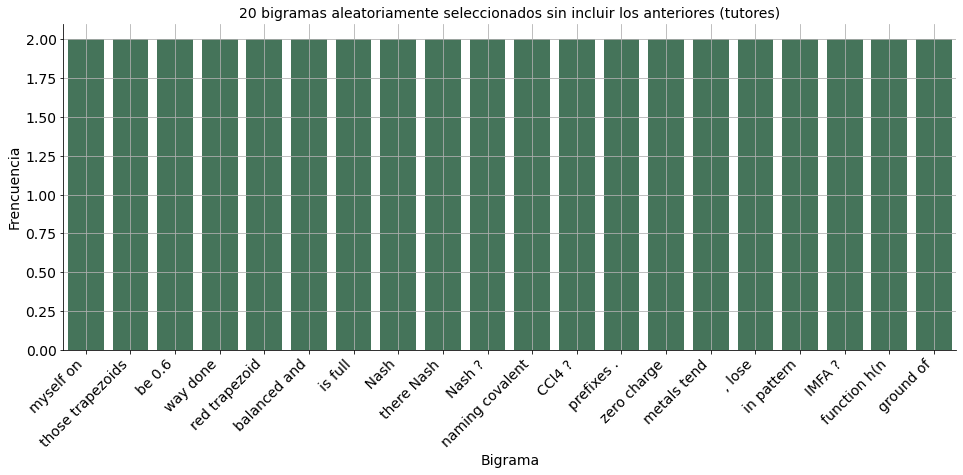

In [22]:
# Bigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams[0:20], y=t_bigrams_counts[0:20], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_bigrams_counts[0:20]):
    chart.text(i, c-2000, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Bigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams[-20::1], y=t_bigrams_counts[-20::1], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len(t_bigrams) -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_bigrams)[sample_indexs], y=np.array(t_bigrams_counts)[sample_indexs], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

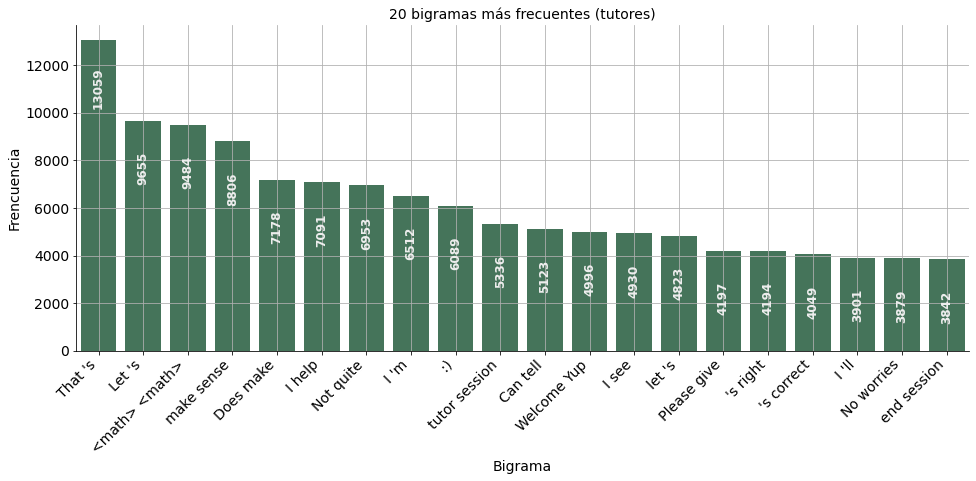

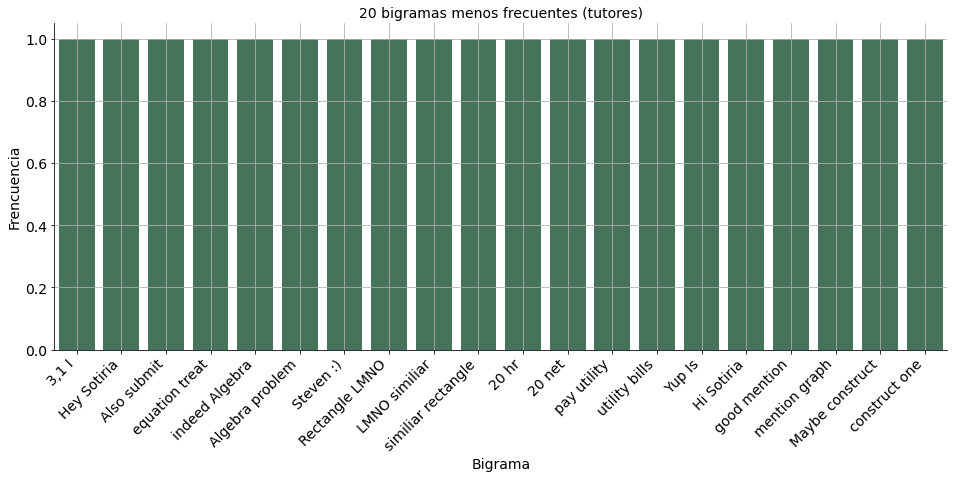

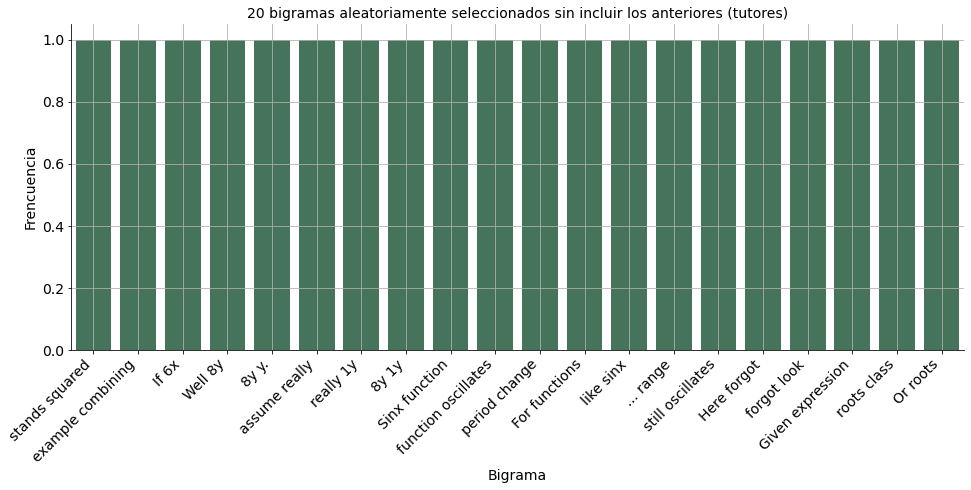

In [21]:
# Bigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams_nonstop[0:20], y=t_bigrams_counts_nonstop[0:20], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_bigrams_counts_nonstop[0:20]):
    chart.text(i, c-2000, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Bigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams_nonstop[-20::1], y=t_bigrams_counts_nonstop[-20::1], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del tutor: 20 aleatorios
sample_index_t_nonstop = np.random.randint(20, len(t_bigrams_nonstop) -40)
sample_indexs_nonstop = np.asarray(range(sample_index_t_nonstop,sample_index_t_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_bigrams_nonstop)[sample_indexs_nonstop], y=np.array(t_bigrams_counts_nonstop)[sample_indexs_nonstop], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

Luego de remover stopwords y non words, las palabras más frecuentes empiezan a ser contracciones muy comunes en el inglés, y en general bigramas muy informativos, como pueden ser 'make sense' o 'not quite'. En general tenemos bigramas con un contenido mas rico si eliminamos stopwords y non words.

## Bigramas del estudiante
#### Los 20 bigramas más frecuentes, los 20 menos frecuentes y 20 bigramas aleatorios en el medio de la distribución
---

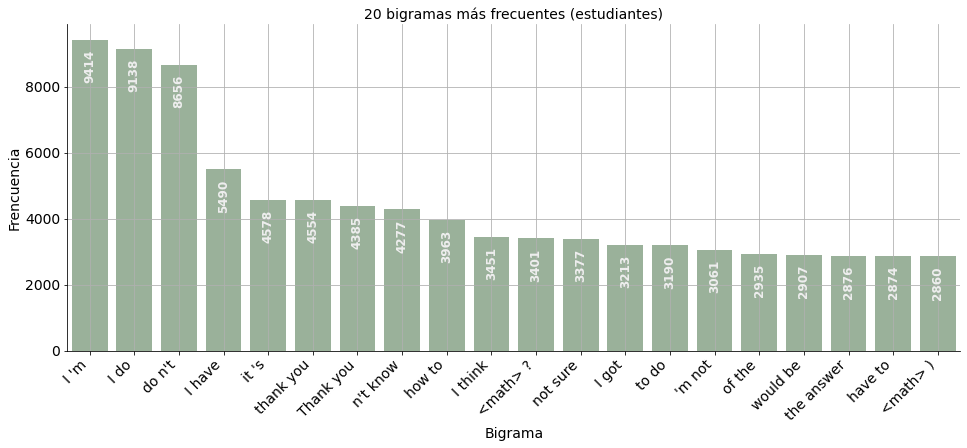

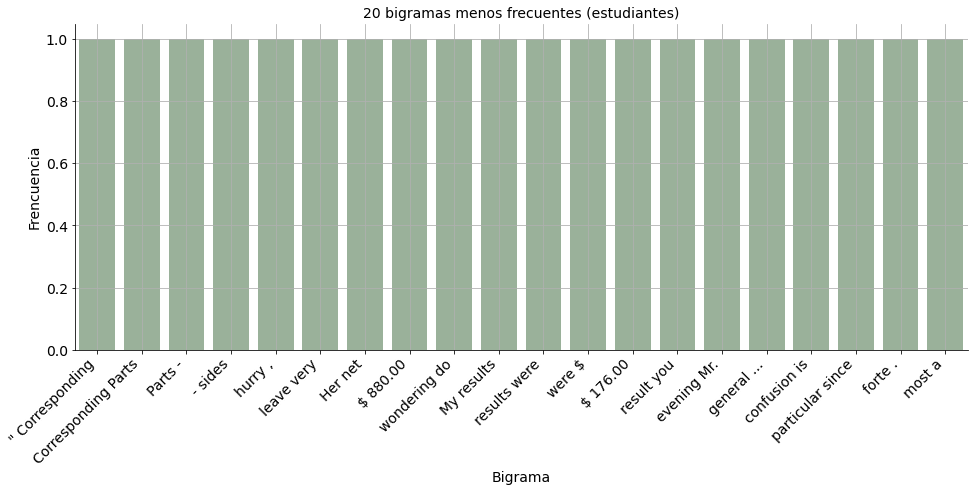

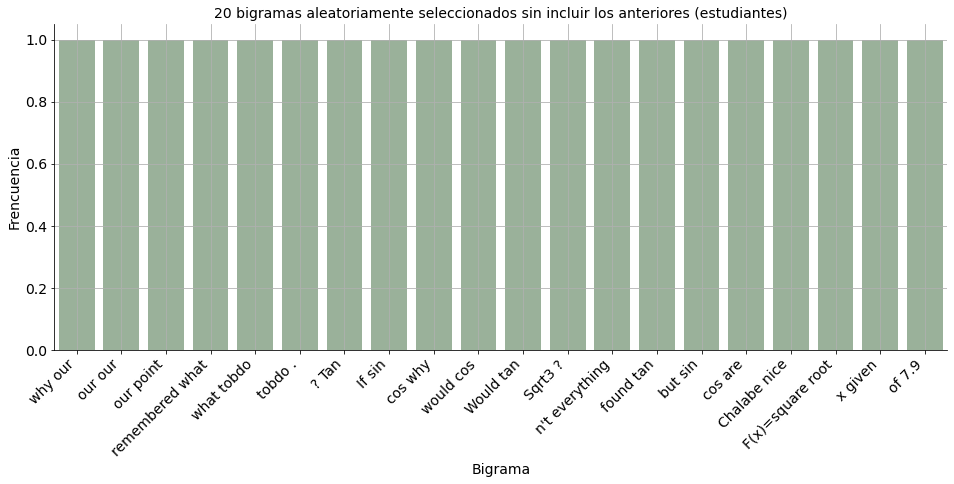

In [23]:
# Bigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams[0:20], y=s_bigrams_counts[0:20], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_bigrams_counts[0:20]):
    chart.text(i, c-800, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Bigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams[-20::1], y=s_bigrams_counts[-20::1], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len(s_bigrams) -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_bigrams)[sample_indexs], y=np.array(s_bigrams_counts)[sample_indexs], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0, flags=flags)
/users/jporta/miniconda3/envs/diplo/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0, flags=flags)


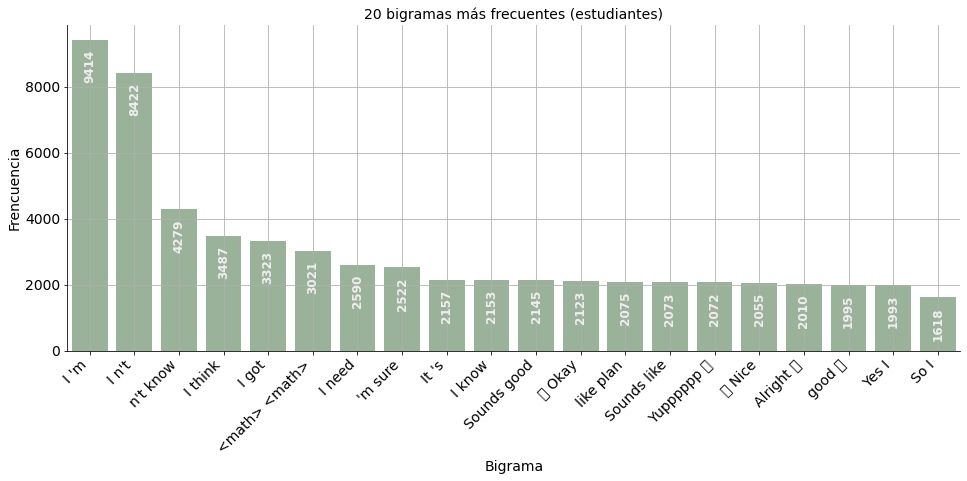

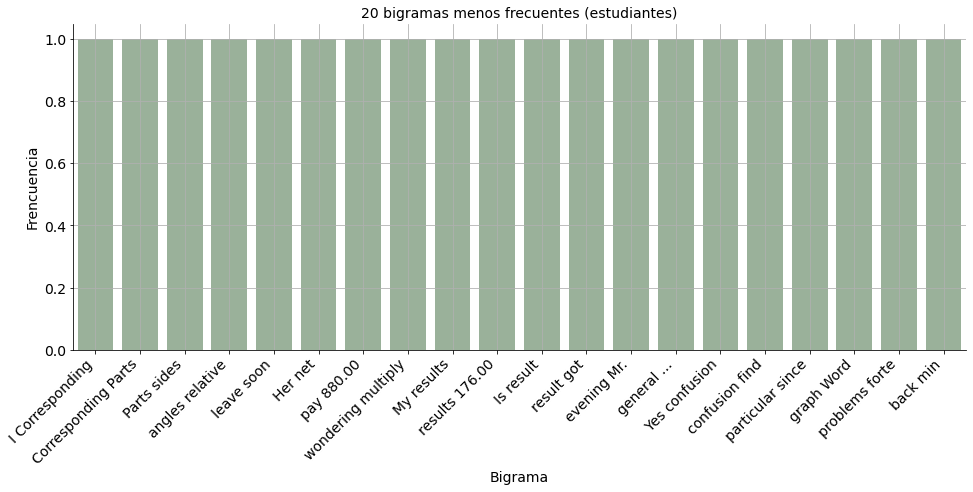

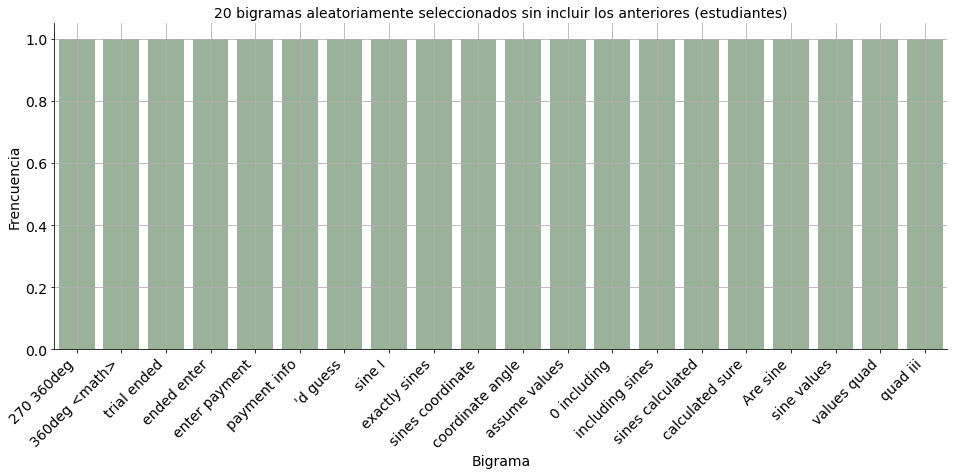

In [24]:
# Bigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams_nonstop[0:20], y=s_bigrams_counts_nonstop[0:20], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_bigrams_counts_nonstop[0:20]):
    chart.text(i, c-800, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Bigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams_nonstop[-20::1], y=s_bigrams_counts_nonstop[-20::1], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del estudiante: 20 aleatorios
sample_index_s_nonstop = np.random.randint(20, len(s_bigrams_nonstop) -40)
sample_indexs_nonstop = np.asarray(range(sample_index_s_nonstop,sample_index_s_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_bigrams_nonstop)[sample_indexs_nonstop], y=np.array(s_bigrams_counts_nonstop)[sample_indexs_nonstop], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

A diferencia de los tutores, en los estudiantes los bigramas no cambian tanto al aplicar la remoción, principalmente debido a la menor utilización de signos de puntuación. Sin embargo, al eliminar el verbo 'do' obtenemos un poco más de información contextual sobre la relación entre las palabras. Por otro lado, al no aparecer el pronombre you, perdemos algunos bigramas informativos como 'thank you'.

## Trigramas del tutor
#### Los 20 trigramas más frecuentes, los 20 menos frecuentes y 20 trigramas aleatorios en el medio de la distribución
---

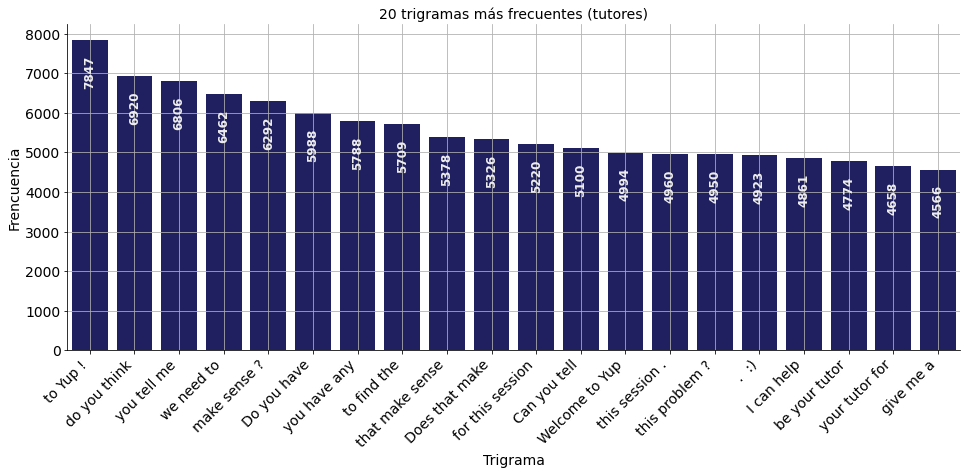

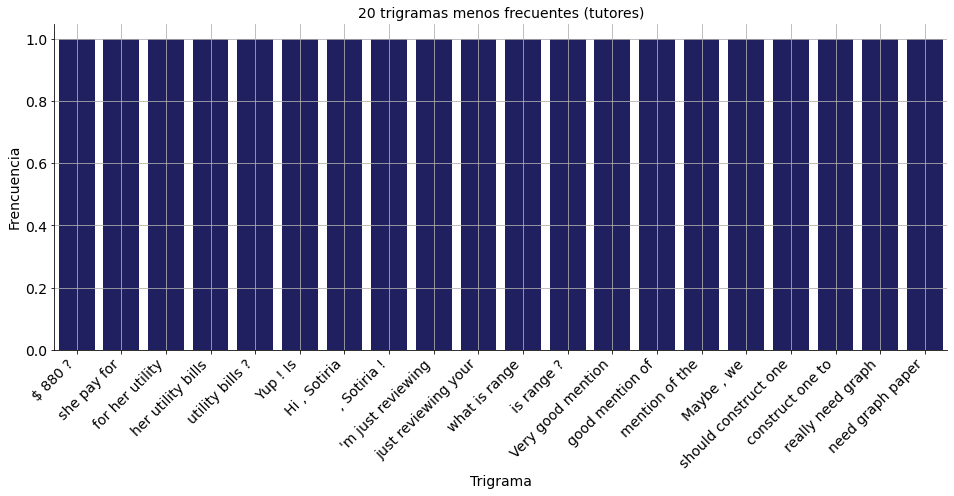

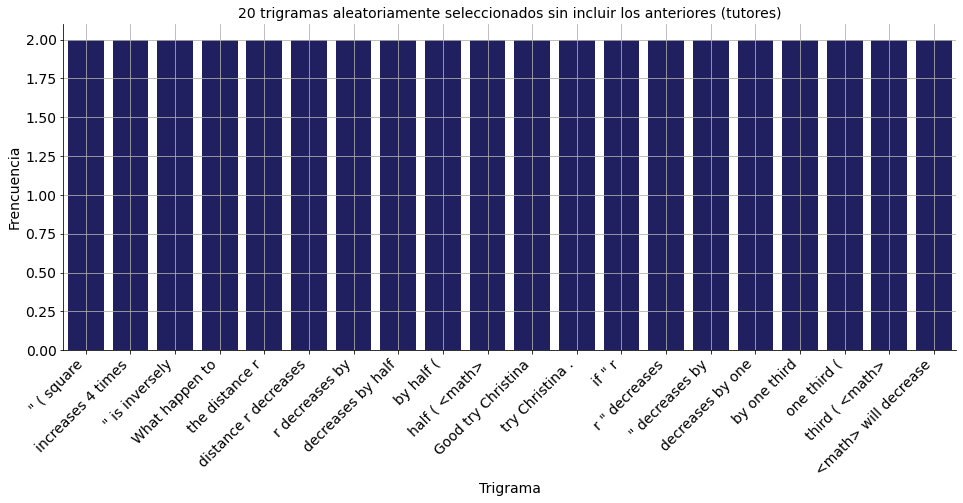

In [27]:
# Trigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams[0:20], y=t_trigrams_counts[0:20], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_trigrams_counts[0:20]):
    chart.text(i, c-800, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Trigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams[-20::1], y=t_trigrams_counts[-20::1], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len(t_trigrams_counts) -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_trigrams)[sample_indexs], y=np.array(t_trigrams_counts)[sample_indexs], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

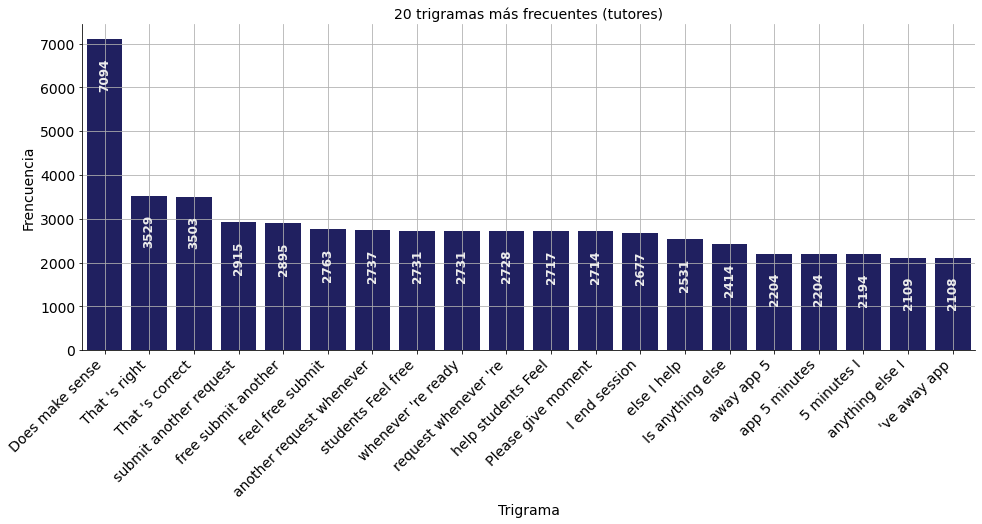

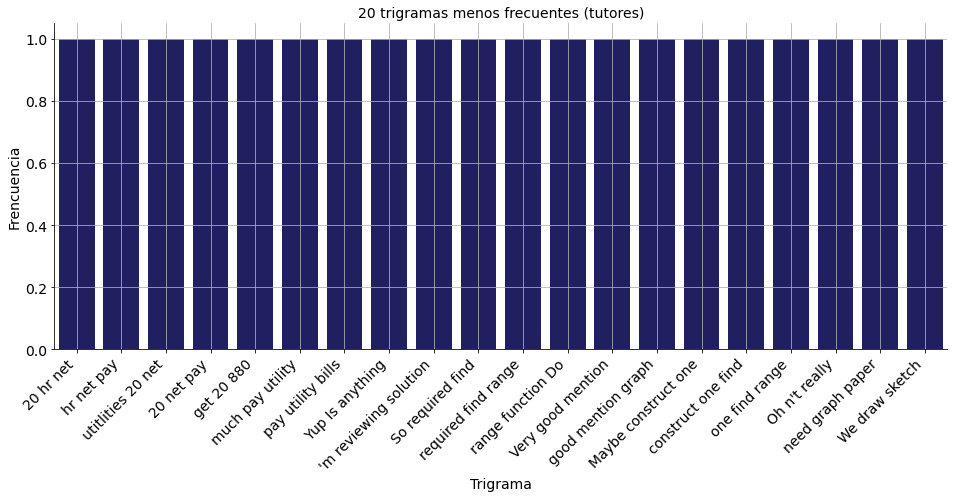

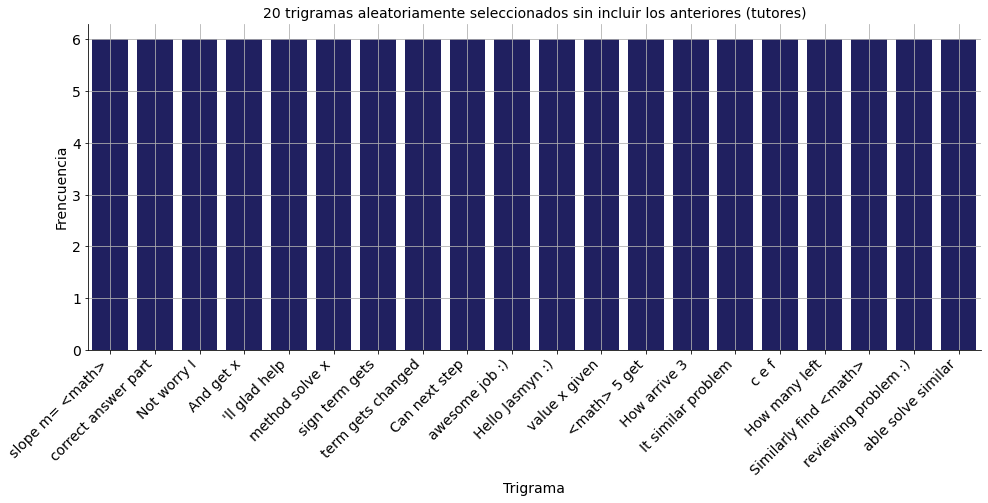

In [28]:
# Trigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams_nonstop[0:20], y=t_trigrams_counts_nonstop[0:20], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(t_trigrams_counts_nonstop[0:20]):
    chart.text(i, c-800, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Trigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams_nonstop[-20::1], y=t_trigrams_counts_nonstop[-20::1], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del tutor: 20 aleatorios
sample_index_t_nonstop= np.random.randint(20, len(t_trigrams_counts_nonstop) -40)
sample_indexs_nonstop = np.asarray(range(sample_index_t_nonstop,sample_index_t_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_trigrams_nonstop)[sample_indexs_nonstop], y=np.array(t_trigrams_counts_nonstop)[sample_indexs_nonstop], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

Nuevamente influye mucho la eliminación de puntuación, del pronompre 'you' y del verbo 'do'. Luego de hacer la remoción, vemos que hay un trigrama muy predominante, como lo es el 'does make sense', y luego el resto de trigramas mas frecuentes aparecen con una frecuencia similar. De nuevo, los trigramas con remoción parecen aportar más información sobre la conversación que antes de la remoción.

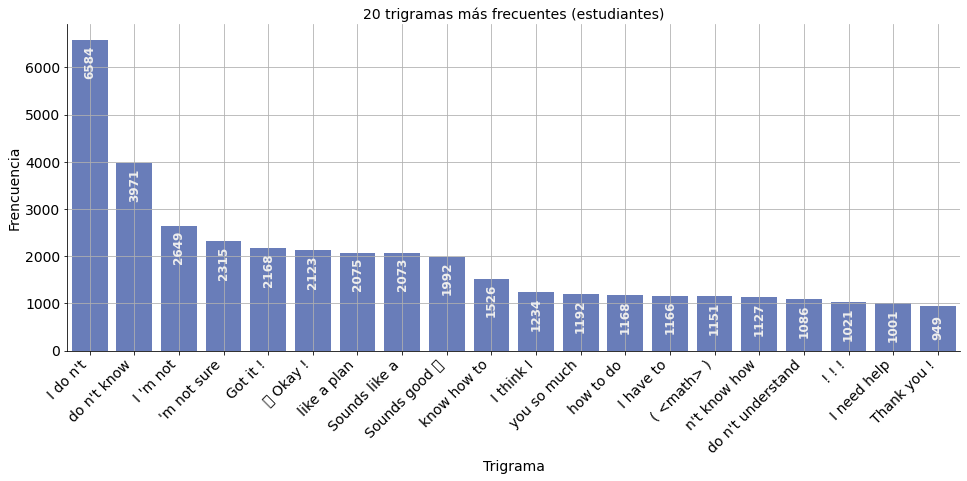

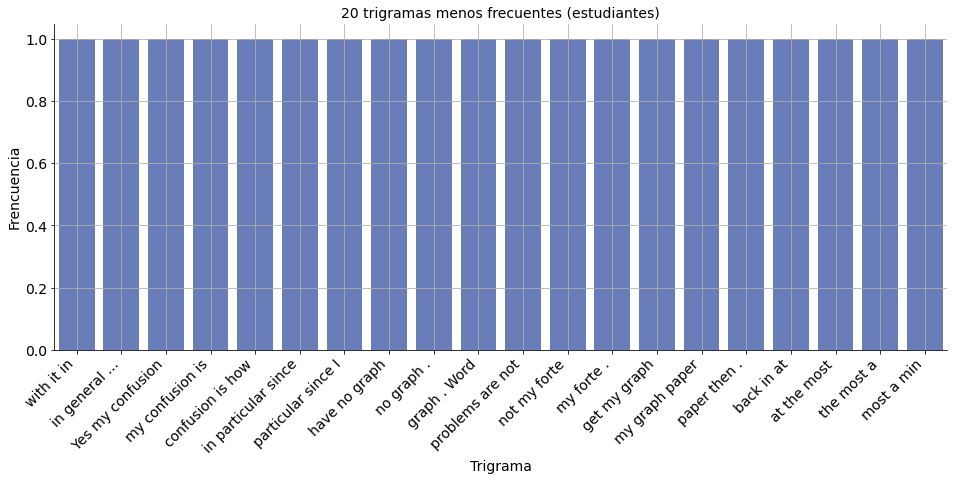

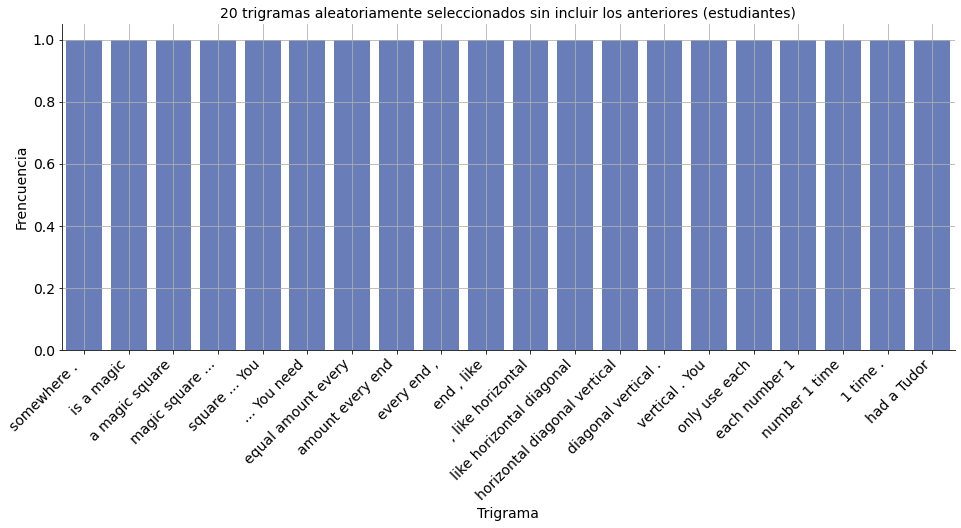

In [29]:
# Trigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams[0:20], y=s_trigrams_counts[0:20], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_trigrams_counts[0:20]):
    chart.text(i, c-460, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Trigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams[-20::1], y=s_trigrams_counts[-20::1], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len(s_trigrams_counts) -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_trigrams)[sample_indexs], y=np.array(s_trigrams_counts)[sample_indexs], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

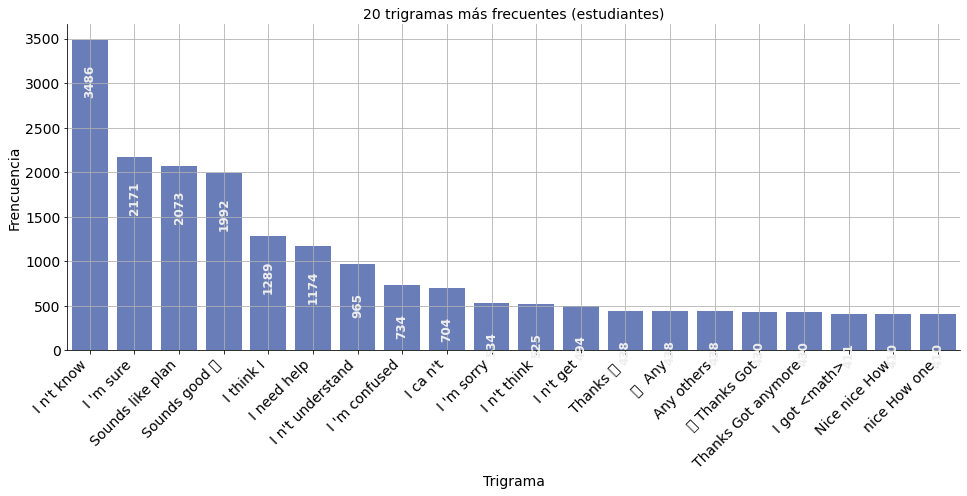

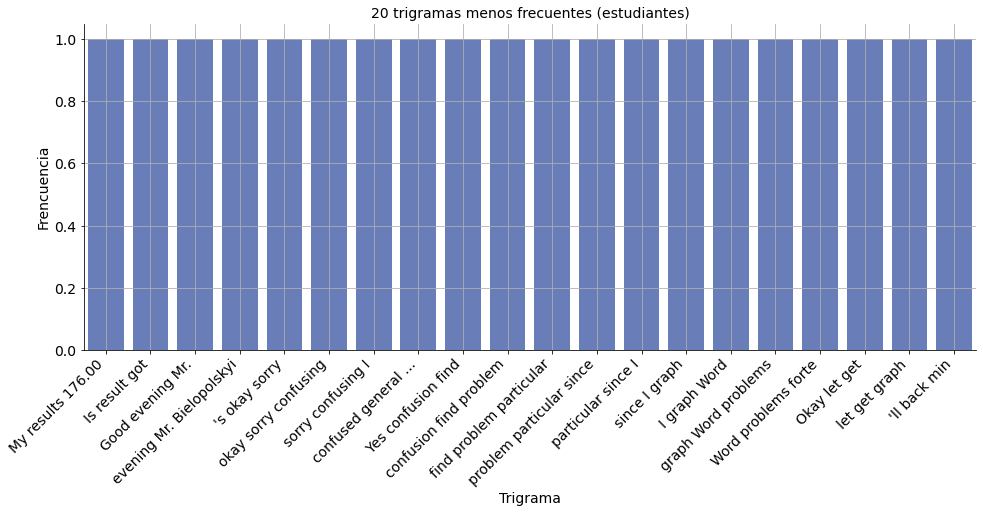

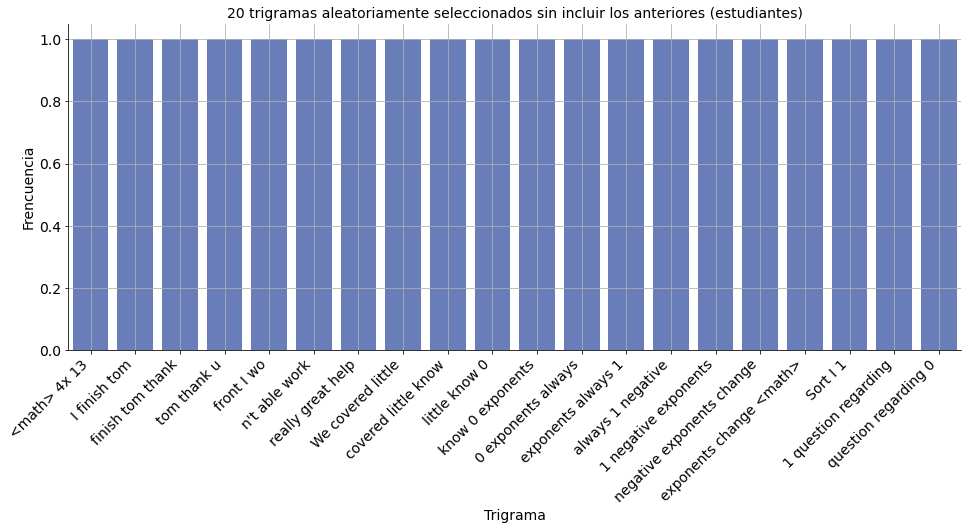

In [32]:
# Trigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams_nonstop[0:20], y=s_trigrams_counts_nonstop[0:20], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()
for i, c in enumerate(s_trigrams_counts_nonstop[0:20]):
    chart.text(i, c-460, c, color='#eeeeee', size=12, weight='bold', ha="center", va="center", rotation=90)

# Trigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams_nonstop[-20::1], y=s_trigrams_counts_nonstop[-20::1], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del estudiante: 20 aleatorios
sample_index_s_nonstop = np.random.randint(20, len(s_trigrams_counts_nonstop) -40)
sample_indexs_nonstop = np.asarray(range(sample_index_s_nonstop,sample_index_s_nonstop + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_trigrams_nonstop)[sample_indexs_nonstop], y=np.array(s_trigrams_counts_nonstop)[sample_indexs_nonstop], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

En el caso de los trigramas de los estudiantes, las palabras más frecuentes parecen mantener un sentido tanto antes como después de la remoción de stopwords y non words. También con respecto a su distribución, siendo en el primer caso el trigrama 'i do n't' el más frecuente, y luego de la remoción es 'i n't know' los cuales provienen de las mismas frases en la mayoría de los casos. Justamente, la menor utilización de puntuación en los estudiantes generan trigramas más regulares.

# Consigna 9

#### Intenten encontrar correlaciones entre palabras que ocurren una seguida de la otra, es decir, traten de identificar qué palabras ocurren más frecuentemente de lo que podríamos considerar casualidad detrás de otra palabra.

#### A esta medida se la llama Información Mutua y su instanciación en el Procesamiento del Lenguaje Natural se llama Información Mutua Puntual (IMP) [3].

#### Encuentren cómo se implementa, y encuentren las secuencias de palabras con mayor IMP. 

#### ¿Qué observan? ¿Nos van a resultar útiles para nuestro objetivo de predecir la satisfacción del estudiante?

https://stackoverflow.com/questions/22118350/python-sentiment-analysis-using-pointwise-mutual-information

## Implementación del cálculo de la Información Mutual Puntual IMP
#### Dada por la expresión:


### $$IMP(a,b) = \log_2 \left( \frac{P(a,b)}{P(a) P(b)} \right) $$

In [33]:
def pmi(unigrams, bigrams):
    sum_unigrams = sum(unigrams.values())
    sum_bigrams = sum(bigrams.values())

    output = dict()
    output['palabra1'] = list()
    output['palabra2'] = list()
    output['conteo_palabra1'] = list()
    output['conteo_palabra2'] = list()
    output['conteo_palabra1y2'] = list()
    output['PMI'] = list()
    for xy in bigrams.keys():
        try:
            x,y = xy.split()
            prob_x = unigrams[x]/sum_unigrams
            prob_y = unigrams[y]/sum_unigrams

            prob_xy = bigrams[xy]/sum_bigrams

            output['palabra1'].append(x)
            output['palabra2'].append(y)
            output['conteo_palabra1'].append(unigrams[x])
            output['conteo_palabra2'].append(unigrams[y])
            output['conteo_palabra1y2'].append(bigrams[xy])
            output['PMI'].append(np.log2(prob_xy/(prob_x*prob_y)))
        except:
            pass
            # print(xy)
    output = pd.DataFrame(output)
    output = output.sort_values(by='PMI', ascending=False)
    return output

## Información Mutua Puntual en los diálogos del tutor

#### Considerando ocurrencia conjunta mayor que 500

In [34]:
tuto_pmi = pmi(tutores_counts, tuto_counts_bg)
tuto_pmi = tuto_pmi[tuto_pmi['conteo_palabra1y2'] > 500]
tuto_pmi.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
61247,Mr,Sharma,774,505,503,13.038480
12535,_,_,1274,1274,981,11.948205
53857,My,name,1008,1189,687,11.871748
8323,Go,ahead,1261,2001,1168,11.563361
3112,Feel,free,2896,3516,2896,10.860675
3117,request,whenever,3408,2955,2748,10.800909
3096,been,away,3121,2680,2234,10.769998
78155,Mr.,Kamireddy,4782,575,561,10.381435
22,square,root,4189,2780,1910,10.066492
9285,walk,through,838,4207,536,9.957101


In [35]:
tuto_pmi_nonstop = pmi(tutores_counts_nonstop, tuto_counts_bg_nonstop)
tuto_pmi_nonstop = tuto_pmi_nonstop[tuto_pmi_nonstop['conteo_palabra1y2'] > 500]
tuto_pmi_nonstop.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
61007,Mr,Sharma,774,505,503,12.175317
52743,My,name,1008,1189,687,11.008585
5850,Go,ahead,1261,2001,1168,10.700198
152005,sent,messages,2166,738,627,10.461259
1867,away,app,2680,2351,2210,10.299986
1873,students,Feel,3259,2896,2731,10.022386
1874,Feel,free,2896,3516,2896,9.997512
1878,request,whenever,3408,2955,2748,9.937746
1875,free,submit,3516,3372,2933,9.796285
81572,Mr.,Kamireddy,4782,575,561,9.518272


Claramente, aquellos bigramas con signos de puntuación desaparecen de la lista. Además, palabras que siempre van mediadas por algún stopword, como 'sent' y 'messages', o 'students' y 'feel' aparecen muy arriba luego de la remoción de las mismas.

## Información Mutua Puntual en los diálogos del estudiante

#### Considerando ocurrencia conjunta mayor que 500

In [36]:
stud_pmi = pmi(students_counts, stud_counts_bg)
stud_pmi = stud_pmi[stud_pmi['conteo_palabra1y2'] > 500]
stud_pmi.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
29670,¡,Hola,734,744,734,11.592756
29610,Yo,😎,767,973,752,11.177125
1700,makes,sense,1118,1303,757,10.221738
2694,square,root,1277,1139,711,10.133526
29796,🙌,Nice,2069,2583,2055,9.787288
678,both,sides,1858,1306,861,9.671310
29666,Alright,👌,3043,2123,2010,9.481727
29609,Hi,👋,4280,803,771,9.009850
27750,Hey,there,1481,3605,850,8.515094
27827,Yupppppp,👍,2072,7108,2072,8.336687


In [37]:
stud_pmi_nonstop = pmi(students_counts_nonstop, stud_counts_bg_nonstop)
stud_pmi_nonstop = stud_pmi_nonstop[stud_pmi_nonstop['conteo_palabra1y2'] > 500]
stud_pmi_nonstop.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
22487,¡,Hola,734,744,734,11.198280
22441,Yo,😎,767,973,752,10.782649
979,makes,sense,1118,1303,821,9.944351
1579,square,root,1277,1139,711,9.739049
22588,🙌,Nice,2069,2583,2055,9.392811
22483,Alright,👌,3043,2123,2010,9.087251
22440,Hi,👋,4280,803,771,8.615374
22610,Nope,yet,2684,1629,831,8.376203
20920,like,plan,5396,2105,2075,8.319055
20927,Yupppppp,👍,2072,7108,2072,7.942211


En el caso de los estudiantes, otra vez observamos que ambas listas se parecen bastante más que en el caso de los tutores, con la incorporación de algunos bigramas que suelen estar mediados por stopwords, como 'like' y 'plan'. Al aparecer los signos de puntuación mas abajo en la lista, los bigramas más frecuentes mantienen bastante su aparición tanto antes como después de la remoción.